In [19]:
import requests
import os
from datetime import datetime
from pathlib import Path
import pyarrow
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt
from shapely.ops import unary_union

In [20]:
# Ready to read data
data_dir = "/Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data"
wf_path =  "/Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/calfire_boundaries/data_2025_01_14.geojson"

fires = gpd.read_file(wf_path)
fires = fires[fires['poly_DateCurrent'] > '2025-01-06']

<Axes: >

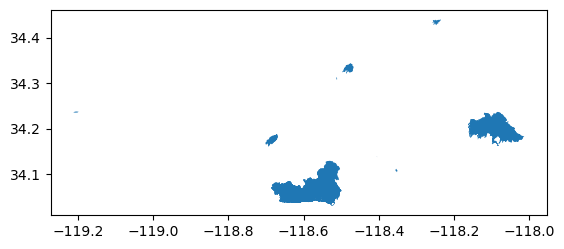

In [21]:
# plot fires
fires.plot()

In [22]:
# Create an empty list to store the groups of intersecting geometries
groups = []

# Iterate over each polygon
for i, poly in fires.iterrows():
    # Check if the polygon intersects with any existing group
    found_group = False
    for group in groups:
        if any(poly.geometry.intersects(g) for g in group):
            group.append(poly.geometry)
            found_group = True
            break
    # If no intersecting group is found, create a new group
    if not found_group:
        groups.append([poly.geometry])

# Perform unary union on each group to merge intersecting geometries
merged_geometries = [unary_union(group) for group in groups]

In [23]:
print(merged_geometries)
# make the list into a geodataframe
# this isn't working but i had to quit
merged_gdf = gpd.GeoDataFrame(geometry=merged_geometries, crs=fires.crs)

[<MULTIPOLYGON (((-119 34, -119 34, -119 34, -119 34, -119 34, -119 34, -119 ...>, <POLYGON ((-118 34.4, -118 34.4, -118 34.4, -118 34.4, -118 34.4, -118 34.4,...>, <MULTIPOLYGON (((-118 34.1, -118 34.1, -118 34.1, -118 34.1, -118 34.1)), ((...>, <MULTIPOLYGON (((-118 34.2, -118 34.2, -118 34.2, -118 34.2, -118 34.2, -118...>, <POLYGON ((-118 34.3, -118 34.3, -118 34.3, -118 34.3, -118 34.3, -118 34.3,...>, <MULTIPOLYGON (((-119 34.2, -119 34.2, -119 34.2, -119 34.2, -119 34.2, -119...>, <MULTIPOLYGON (((-119 34.3, -119 34.3, -119 34.3, -119 34.3, -119 34.3, -119...>, <MULTIPOLYGON (((-119 34.2, -119 34.2, -119 34.2, -119 34.2, -119 34.2)), ((...>]


In [ ]:
print(merged_gdf)

In [25]:
# write merged_geometries as parquet 
# separate fires 
sep_fires_path = os.path.join(data_dir, 'sep_fires.parquet')
merged_gdf.to_parquet(sep_fires_path)
